# Hands On - Predicting Entertainment Hits - Introduction to Clustering and Recommenders

## Import

In [1]:
import pandas as pd
movies = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/movie_data.csv")

## Checking Structure

In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      8546 non-null   int64  
 1   title        8546 non-null   object 
 2   year         8546 non-null   int64  
 3   Action       8546 non-null   int64  
 4   Adventure    8546 non-null   int64  
 5   Animation    8546 non-null   int64  
 6   Children     8546 non-null   int64  
 7   Comedy       8546 non-null   int64  
 8   Crime        8546 non-null   int64  
 9   Documentary  8546 non-null   int64  
 10  Drama        8546 non-null   int64  
 11  Fantasy      8546 non-null   int64  
 12  FilmNoir     8546 non-null   int64  
 13  Horror       8546 non-null   int64  
 14  Musical      8546 non-null   int64  
 15  Mystery      8546 non-null   int64  
 16  Romance      8546 non-null   int64  
 17  SciFi        8546 non-null   int64  
 18  Thriller     8546 non-null   int64  
 19  War   

In [3]:
movies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,rating
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.872470
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.401869
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3.161017
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2.384615
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.267857


In [4]:
genre_data = movies.iloc[:,3:21]
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Action       8546 non-null   int64
 1   Adventure    8546 non-null   int64
 2   Animation    8546 non-null   int64
 3   Children     8546 non-null   int64
 4   Comedy       8546 non-null   int64
 5   Crime        8546 non-null   int64
 6   Documentary  8546 non-null   int64
 7   Drama        8546 non-null   int64
 8   Fantasy      8546 non-null   int64
 9   FilmNoir     8546 non-null   int64
 10  Horror       8546 non-null   int64
 11  Musical      8546 non-null   int64
 12  Mystery      8546 non-null   int64
 13  Romance      8546 non-null   int64
 14  SciFi        8546 non-null   int64
 15  Thriller     8546 non-null   int64
 16  War          8546 non-null   int64
 17  Western      8546 non-null   int64
dtypes: int64(18)
memory usage: 1.2 MB


# Workflow for Hierarchical Clustering

## 1) Inspect Dendrogram

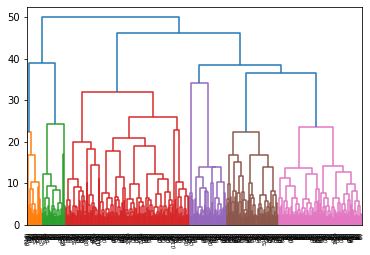

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# prepare data for dendogram
Z = linkage(genre_data, 'ward')

# plot dendrogram
dn = dendrogram(Z, p=500, truncate_mode="lastp")

## 2) Create Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering
clusters3 = AgglomerativeClustering(n_clusters=3).fit(genre_data)
clusters8 = AgglomerativeClustering(n_clusters=8).fit(genre_data)

In [7]:
labels3 = clusters3.labels_
labels8 = clusters8.labels_

## 3) Compare Clustering

In [8]:
genre_data.groupby(labels3).mean()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.026962,0.010060,0.001610,0.006036,0.820523,0.088531,0.000000,0.478471,0.004829,0.000805,0.007646,0.000402,0.024547,0.434608,0.001207,0.053521,0.004024,0.000402
1,0.392284,0.245476,0.115056,0.124274,0.266644,0.121202,0.149539,0.168317,0.191533,0.000683,0.243769,0.049164,0.035848,0.051553,0.157733,0.270399,0.012632,0.003756
2,0.054917,0.090038,0.018838,0.049808,0.093231,0.140805,0.007024,0.795977,0.014368,0.036398,0.015964,0.074074,0.107918,0.083014,0.077905,0.212005,0.097382,0.047573


In [9]:
genre_data.groupby(labels8).mean()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.054329,0.120141,0.025618,0.068905,0.127208,0.017226,0.009276,0.801678,0.016343,0.000442,0.007951,0.102473,0.015459,0.095406,0.102473,0.034452,0.133834,0.065813
1,0.037037,0.014815,0.003704,0.010185,0.587037,0.056481,0.000000,0.634259,0.005556,0.000926,0.015741,0.000926,0.012963,1.000000,0.000926,0.059259,0.008333,0.000926
2,0.854902,0.358824,0.012745,0.003922,0.260784,0.300980,0.005882,0.246078,0.006863,0.000980,0.013725,0.000980,0.016667,0.045098,0.243137,0.423529,0.029412,0.002941
3,0.019217,0.006406,0.000000,0.002847,1.000000,0.113167,0.000000,0.358719,0.004270,0.000712,0.001423,0.000000,0.033452,0.000000,0.001423,0.049110,0.000712,0.000000
4,0.230100,0.422886,0.399254,0.447761,0.467662,0.017413,0.006219,0.161692,0.645522,0.001244,0.054726,0.140547,0.018657,0.124378,0.077114,0.041045,0.004975,0.009950
5,0.133627,0.019090,0.004405,0.000000,0.148311,0.049927,0.004405,0.138032,0.051395,0.000000,0.963289,0.005874,0.107195,0.007342,0.220264,0.480176,0.004405,0.000000
6,0.002358,0.000000,0.000000,0.000000,0.089623,0.000000,1.000000,0.042453,0.000000,0.000000,0.000000,0.061321,0.000000,0.000000,0.004717,0.000000,0.000000,0.000000
7,0.056452,0.011521,0.001152,0.000000,0.004608,0.463134,0.001152,0.781106,0.009217,0.130184,0.036866,0.000000,0.349078,0.050691,0.013825,0.675115,0.002304,0.000000


## 4) Evaluate Clustering

In [10]:
from sklearn.metrics import silhouette_score
print(silhouette_score(genre_data, labels3))
print(silhouette_score(genre_data, labels8))

0.1323540474902286
0.2307680213117143


# Repeating with Kmeans

In [11]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(genre_data)
kmeans8  = KMeans(n_clusters=8, random_state=1).fit(genre_data)

kmeans_labels3 = kmeans3.labels_
kmeans_labels8 = kmeans8.labels_

from sklearn.metrics import silhouette_score
print(silhouette_score(genre_data, kmeans_labels3))
print(silhouette_score(genre_data, kmeans_labels8))

0.2425397155612789
0.2913530657163521


# Building a Mini-Recommender

In [12]:
movies["cluster"] = kmeans_labels8
movies.loc[movies.title =="Toy Story",:]

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,rating,cluster
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3.87247,0


In [13]:
movies.loc[movies.cluster==0,:].sort_values(["year","rating"], ascending=False).head(10)

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,rating,cluster
8512,156025,Ice Age: The Great Egg-Scapade,2016,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,5.000000,0
8504,152081,Zootopia,2016,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,4.000000,0
8537,160718,Piper,2016,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.000000,0
8517,157296,Finding Dory,2016,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,3.333333,0
8379,136016,The Good Dinosaur,2015,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,4.500000,0
8367,134853,Inside Out,2015,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,4.041667,0
8319,130520,Home,2015,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,4.000000,0
8469,145935,"Peanuts Movie, The",2015,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,4.000000,0
8378,135887,Minions,2015,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,2.900000,0
8411,139855,Anomalisa,2015,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2.000000,0
